# Plotting Chicago pothole reports from the [Chicago Data Portal](https://data.cityofchicago.org/)

See the data/ directory for more information about this data set.  

Note: if you are working from the geo_forge conda environment, you will need to install pandas and geopandas.  When installing geopandas, it is very important that all your packages come from the same channel.  I recommend using the conda-forge channel (which is what we set the geo_forge environment to use).
```
$ conda activate geo_forge
$ conda install --channel conda-forge geopandas pandas
```

In [11]:
import rasterio
from rasterio.plot import show as showRasterio

import pandas as pd
import geopandas as gpd

import numpy as np

from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.cm as cm
from matplotlib.colors import Normalize
from matplotlib import colormaps

%matplotlib inline

## Read in the CSV data using pandas 

In [2]:
# read in the CSV data file and keep only rows with valid data
df = pd.read_csv('data/311_Service_Requests_-_Pot_Holes_Reported_-_Historical.csv').dropna(subset=['ZIP'])

## use geopandas to define the geometry (not necessary for this particular plot)
# df['ZIP Code Location'] = gpd.points_from_xy(df['LONGITUDE'], df['LATITUDE']) 

# convert dates to datetime objects
df['CREATION DATE'] = pd.to_datetime(df['CREATION DATE'])

In [3]:
# Take a subset of the dates (after inspecting the data, there are very few before 2011, and none after 2019)
minDate = np.datetime64('2011-01-01')
maxDate = np.datetime64('2019-01-01') 
df = df.loc[(df['CREATION DATE'] > minDate) & (df['CREATION DATE'] < maxDate)]

In [4]:
df

,CREATION DATE,STATUS,COMPLETION DATE,SERVICE REQUEST NUMBER,TYPE OF SERVICE REQUEST,CURRENT ACTIVITY,MOST RECENT ACTION,NUMBER OF POTHOLES FILLED ON BLOCK,STREET ADDRESS,ZIP,X COORDINATE,Y COORDINATE,Ward,Police District,Community Area,SSA,LATITUDE,LONGITUDE,LOCATION
1,2018-08-05,Open,NaN,18-02306504,Pothole in Street,NaN,NaN,NaN,3921 W 77TH ST,60652.0,1.151404e+06,1.853111e+06,18.0,8.0,70.0,NaN,41.752697,-87.721288,"(41.752696566048, -87.721287716596)"
2,2018-07-18,Open,NaN,18-02134465,Pothole in Street,NaN,NaN,NaN,6030 N PETERSON AV EDENS XR,60646.0,1.142563e+06,1.939575e+06,39.0,16.0,12.0,NaN,NaN,NaN,NaN
4,2018-04-26,Completed,04/30/2018,18-01332777,Pothole in Street,Final Outcome,Pothole Patched,10.0,1500 N LUIS MUNOZ MARIN DR,60622.0,1.154972e+06,1.909808e+06,26.0,14.0,24.0,NaN,NaN,NaN,NaN
5,2014-01-14,Completed,04/02/2014,14-00061365,Pot Hole in Street,Final Outcome,Pothole Patched,13.0,3925 W ACCESS ST,60623.0,1.150732e+06,1.882114e+06,22.0,10.0,30.0,NaN,NaN,NaN,NaN
6,2018-09-18,Open,NaN,18-02695671,Pothole in Street,NaN,NaN,NaN,845 W 69TH ST,60621.0,1.171762e+06,1.859097e+06,6.0,7.0,68.0,NaN,41.768702,-87.646285,"(41.768701626769, -87.646285147026)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
560473,2014-01-16,Completed,01/16/2014,14-00078504,Pot Hole in Street,Final Outcome,Pothole Patched,8.0,600 W LAWRENCE DR,60640.0,1.171226e+06,1.932285e+06,48.0,20.0,3.0,NaN,41.969761,-87.645873,"(41.969760902199, -87.645873414024)"
560474,2011-04-08,Completed,04/08/2011,11-00692408,Pot Hole in Street,Dispatch Crew,Pothole Patched,4.0,300 N COLUMBUS DR,60601.0,1.178296e+06,1.902193e+06,42.0,1.0,32.0,NaN,41.886973,-87.620848,"(41.886973200874, -87.620848332588)"
560475,2015-02-13,Completed,02/13/2015,15-00278010,Pothole in Street,Final Outcome,Pothole Patched,2.0,1200 N SB OUTER LAKE SHORE DR,60610.0,1.177169e+06,1.908428e+06,43.0,18.0,8.0,NaN,41.904077,-87.624804,"(41.904076743028, -87.624803937073)"
560476,2014-03-17,Completed,04/17/2014,14-00378244,Pothole in Street,Final Outcome,Completed Upon Arrival,0.0,6338 N LAKEWOOD AVE,60660.0,1.166464e+06,1.942226e+06,40.0,24.0,77.0,26.0,41.997504,-87.663152,"(41.997504454481, -87.663152299196)"


## Read in the Shapefile using GeoPandas

In [5]:
# use GeoPandas to read in the shape file with the ZIP code boundaries
gdf = gpd.read_file('data/Boundaries_ZIP_Codes/geo_export_94cfa385-03be-4b00-b827-c9e4fdd73a8f.shp')
gdf

,objectid,shape_area,shape_len,zip,geometry
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917..."
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922..."
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909..."
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888..."
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895..."
...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830..."
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757..."
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721..."
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795..."


In [6]:
# match the data to include in the plot
totalPotholes = [0 for foo in gdf.index]

for i, rowPoly in gdf.iterrows():
    zipCode = float(rowPoly['zip'])
    df1 = df.loc[df['ZIP'] == zipCode]
    totalPotholes[i] = len(df1.index)

## if you needed to match using geometry, you could do it this way
#     for j, rowPoint in df1.iterrows(): 
#         point = rowPoint['ZIP Code Location']
#         poly = rowPoly['geometry']
#         if point.within(poly):
#             totalPotholes[i] += 1 

gdf['Total Potholes'] = totalPotholes

In [7]:
# add a central point for labels
# https://stackoverflow.com/questions/38899190/geopandas-label-polygons
gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]

In [8]:
gdf

,objectid,shape_area,shape_len,zip,geometry,Total Potholes,coords
0,33.0,1.060523e+08,42720.044406,60647,"POLYGON ((-87.67762 41.91776, -87.67761 41.917...",17735,"(-87.70220973997314, 41.92114695457026)"
1,34.0,1.274761e+08,48103.782721,60639,"POLYGON ((-87.72683 41.92265, -87.72693 41.922...",15775,"(-87.75600216892195, 41.92049190381994)"
2,35.0,4.506904e+07,27288.609612,60707,"POLYGON ((-87.78500 41.90915, -87.78531 41.909...",4458,"(-87.79572745813655, 41.919947749107685)"
3,36.0,7.085383e+07,42527.989679,60622,"POLYGON ((-87.66707 41.88885, -87.66707 41.888...",9563,"(-87.68714493159418, 41.903181639073004)"
4,37.0,9.903962e+07,47970.140153,60651,"POLYGON ((-87.70656 41.89555, -87.70672 41.895...",9981,"(-87.74108015235538, 41.90253023986556)"
...,...,...,...,...,...,...,...
56,57.0,1.552855e+08,53406.915617,60623,"POLYGON ((-87.69479 41.83008, -87.69486 41.830...",12958,"(-87.71729720778268, 41.84608482023964)"
57,58.0,2.111148e+08,58701.325375,60629,"POLYGON ((-87.68306 41.75786, -87.68306 41.757...",22526,"(-87.71285963168273, 41.7752053734265)"
58,59.0,2.116961e+08,58466.160298,60620,"POLYGON ((-87.62373 41.72167, -87.62388 41.721...",17736,"(-87.6534161692619, 41.73964616772879)"
59,60.0,1.254243e+08,52377.854541,60637,"POLYGON ((-87.57691 41.79511, -87.57700 41.795...",8614,"(-87.60591080909256, 41.780367606120336)"


## Read in the GeoTIFF file with rasterio

In [9]:
# use rasterio to read in the GeoTIFF file
chicago = rasterio.open('../ChicagoGeoTIFF.tif')

## Create the figure

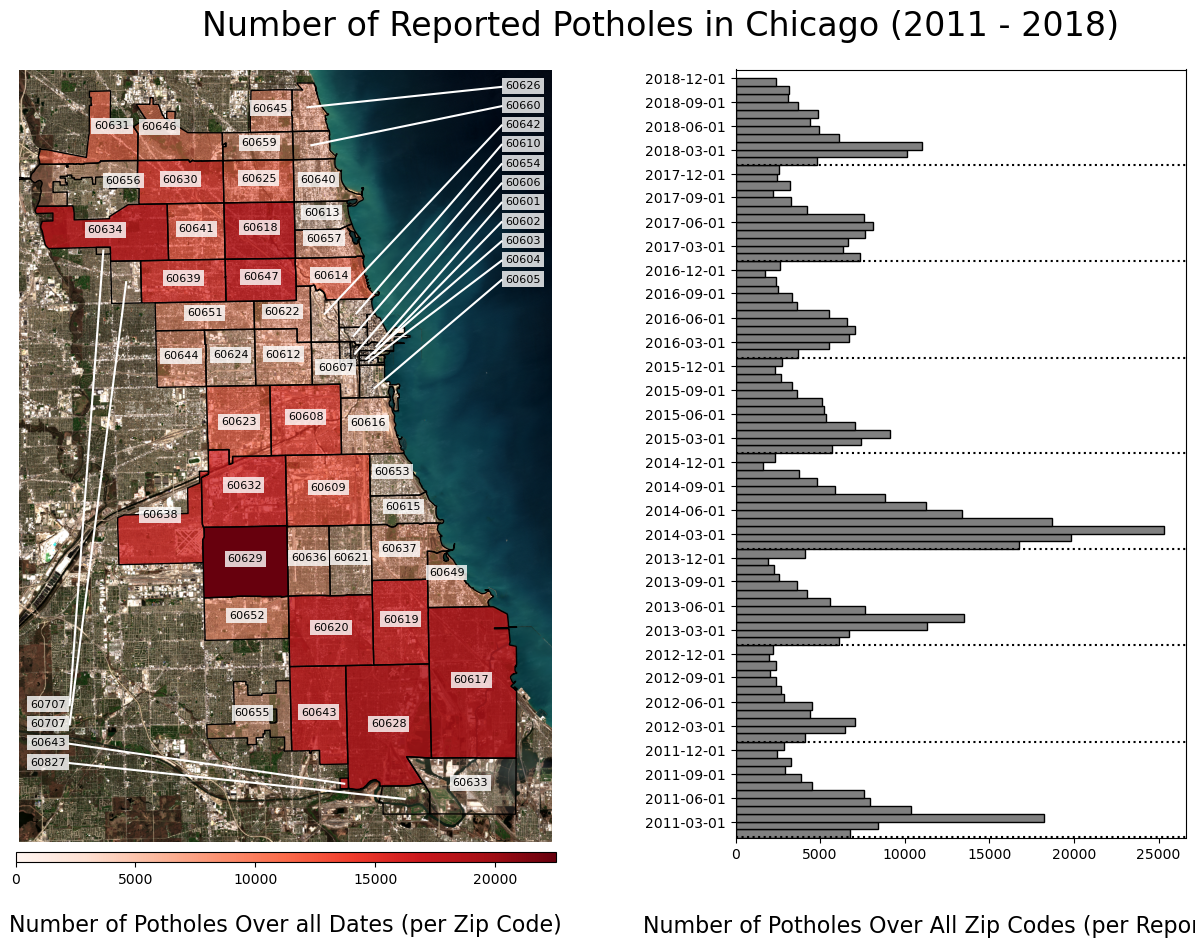

In [16]:
# create the figure.  I will add the axes below individually so that I can get the axes to align as I'd like

use = gdf
lims = [[-87.87, -87.5], [41.63, 42.03]]
f = plt.figure(figsize = (15, 10))

f.suptitle('Number of Reported Potholes in Chicago (2011 - 2018)', fontsize = 24)

#######################################
# Map

#create the axes
ax1 = f.add_axes([0., 0, 0.5, 0.92])

# set the axis limits
ax1.set_xlim(lims[0])
ax1.set_ylim(lims[1])

# label the axes
# ax.set_xlabel('Longitude', fontsize = 16)
# ax.set_ylabel('Latitude', fontsize = 16)

# remove the axes
aoff = ['right', 'left', 'top', 'bottom']
for x in aoff:
    ax1.spines[x].set_visible(False)
ax1.tick_params(length=0)

# fixing ticks with matplotlib.ticker "FixedLocator"
xticks_loc = ax1.get_xticks().tolist()
ax1.xaxis.set_major_locator(mticker.FixedLocator(xticks_loc))
ax1.set_xticklabels([' ' for x in xticks_loc])

yticks_loc = ax1.get_yticks().tolist()
ax1.yaxis.set_major_locator(mticker.FixedLocator(yticks_loc))
ax1.set_yticklabels([' ' for y in yticks_loc])

# plot the satellite map
showRasterio(chicago.read(), ax = ax1, transform = chicago.transform)

# set the colormap for the choropleth
cmapName = 'Reds'
# previous syntax
# cmap = cm.get_cmap(cmapName)
# new syntax
cmap = colormaps[cmapName]

# normalize so that I can use the colormap
maxN = max(use['Total Potholes'])
minN = min(use['Total Potholes'])
norm = Normalize(vmin = minN, vmax = maxN)

# plot the shapefile as a choropleth, with outlines
co = cmap(norm(use['Total Potholes']))
ap = norm((use['Total Potholes'])).clip(0,1)
use.plot(ax = ax1, color = co, zorder = 3, alpha = ap)
use.plot(ax = ax1, zorder = 3, facecolor = 'none', edgecolor = 'black')

# add the colorbar
n_cmap = cm.ScalarMappable(norm = norm, cmap = cmapName)
cbar = f.colorbar(n_cmap, ax = ax1, orientation = 'horizontal', location = 'bottom', shrink = 0.72, aspect=50, pad = 0.01)
cbar.ax.set_xlim(0, maxN)
cbar.ax.set_xlabel('Number of Potholes Over all Dates (per Zip Code)', fontsize = 16, labelpad = 20)

# annotate the plot to include the zip codes
# I will have to do some of this by hand, but I will try to get this as close to an algorithm as possible...
badRows = pd.DataFrame() #this will hold any that need special handling (i.e., those in small areas)
for idx, row in use.iterrows():
    if (row.coords[0] > lims[0][0]):
        if (row.geometry.area > 5e-4):
            ax1.text(row.coords[0], row.coords[1], s = row.zip, horizontalalignment = 'center', color = 'black', fontsize = 8,
                bbox = {'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
        else:
            # previous syntax (not deprecated)
            # badRows = badRows.append(row)
            # new syntax
            badRows = pd.concat([badRows, pd.DataFrame([row])], ignore_index=True)

# sort these rows so that I can move the labels to the side of the plot and include lines that don't overlap
badRows['xLoc'] = [coords[0] for coords in badRows['coords']]
badRows['yLoc'] = [coords[1] for coords in badRows['coords']]
badRows['xyLoc'] = [coords[0]*coords[1] for coords in badRows['coords']]
badRows.sort_values('xyLoc', ascending = True, inplace = True)
# I noticed that two of the zips still have criss-crossing lines.  I will swap their order manually
a = badRows.loc[badRows['zip'] == '60611'].copy()
b = badRows.loc[badRows['zip'] == '60661'].copy()
badRows.loc[badRows['zip'] == '60611'] = b
b = badRows.loc[badRows['zip'] == '60661'] = a
#now add these annotations in, along the right side of the plot
x = lims[0][1] - 0.02
y = lims[1][1] - 0.01
dy = 0.01
badRowsR = badRows.loc[(badRows['xLoc'] > np.mean(lims[0])) & (badRows['yLoc'] > np.mean(lims[1]))]
for idx, row in badRowsR.iterrows():
    ax1.text(x, y, s = row.zip, horizontalalignment = 'center', color = 'black', fontsize = 8,
        bbox = {'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
    xx = x - 0.015
    yy = y + 0.001
    ax1.plot([xx, row.coords[0]], [yy, row.coords[1]], color = 'white', zorder = 4) 
    y -= dy
# and along the left side of the plot
badRowsL = badRows.loc[(badRows['xLoc'] < np.mean(lims[0])) | (badRows['yLoc'] < np.mean(lims[1]))]
x = lims[0][0] + 0.02
y = lims[1][0] + 0.07
for idx, row in badRowsL.iterrows():
    ax1.text(x, y, s = row.zip, horizontalalignment = 'center', color = 'black', fontsize = 8,
        bbox = {'facecolor': 'white', 'alpha':0.8, 'pad': 2, 'edgecolor':'none'})
    xx = x + 0.015
    yy = y + 0.001
    ax1.plot([xx, row.coords[0]], [yy, row.coords[1]], color = 'white', zorder = 4) 
    y -= dy
    

#######################################
# histogram

# create the axes
b = 0.152
ax2 = f.add_axes([0.55, b, 0.3, 0.92 - b])

# set the axis limits
ax2.set_ylim(minDate, maxDate)

# label the axes
ax2.set_xlabel('Number of Potholes Over All Zip Codes (per Report Date)', fontsize = 16, labelpad = 38)
#ax2.set_ylabel('Date', fontsize = 16, labelpad = 15)

# define the bins and create the histogram
bins = np.arange(minDate, maxDate, np.timedelta64(1, 'M'),  dtype = 'datetime64[M]')
ax2.hist(df['CREATION DATE'], bins = bins, color = 'gray', orientation = 'horizontal', histtype = 'bar', ec = 'black')

# define the tick marks every 3 months (once per season)
yticks = np.arange(np.datetime64('2011-03-01'), maxDate, np.timedelta64(3, 'M'),  dtype = 'datetime64[M]')
ax2.set_yticks(yticks)

# plot lines to divide the years
lines = np.arange(minDate, maxDate, np.timedelta64(1, 'Y'),  dtype = 'datetime64[M]')
for l in lines:
    ax2.axhline(y = l, color = 'black', linestyle = 'dotted')
    
    
# save the image
f.savefig('Chicago_Potholes.png', bbox_inches = 'tight', dpi = 200)
f.savefig('Chicago_Potholes_banner.png', bbox_inches = 'tight', dpi = 400)

## Simplified example

In [17]:
import rasterio
import pandas as pd
import geopandas as gpd
df = pd.read_csv('data/311_Service_Requests_-_Pot_Holes_Reported_-_Historical.csv')
gdf = gpd.read_file('data/Boundaries_ZIP_Codes/geo_export_94cfa385-03be-4b00-b827-c9e4fdd73a8f.shp')
chicago = rasterio.open('../ChicagoGeoTIFF.tif')

df['CREATION DATE'] = pd.to_datetime(df['CREATION DATE'])

In [18]:
totalPotholes = [0 for foo in gdf.index]

for i, rowPoly in gdf.iterrows():
    zipCode = float(rowPoly['zip'])
    df1 = df.loc[df['ZIP'] == zipCode]
    totalPotholes[i] = len(df1.index)

gdf['Total Potholes'] = totalPotholes

<Axes: >

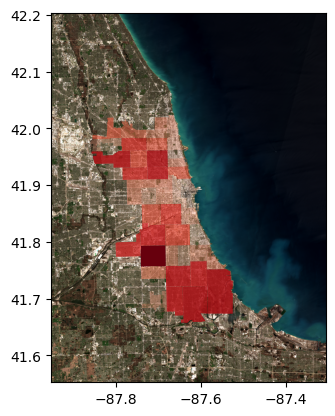

In [21]:
import matplotlib
import rasterio

f,ax = matplotlib.pyplot.subplots()

chicago = rasterio.open('../ChicagoGeoTIFF.tif')
rasterio.plot.show(chicago.read(), ax = ax, transform = chicago.transform)
# previous syntax
# cmap = matplotlib.cm.get_cmap(cmapName)
# new syntax
cmap = matplotlib.colormaps['Reds']

norm = matplotlib.colors.Normalize(vmin = min(gdf['Total Potholes']), vmax = max(gdf['Total Potholes']))
co = cmap(norm(gdf['Total Potholes']))
ap = norm(gdf['Total Potholes']).clip(0,1)
gdf.plot(ax = ax, color = co, alpha = ap)

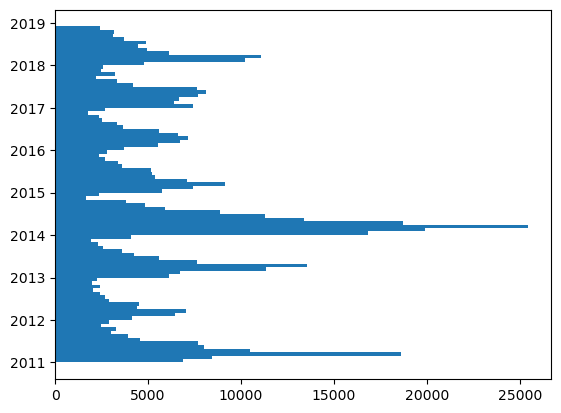

In [22]:
import matplotlib.pyplot as plt
import numpy as np

f, ax = plt.subplots()

minDate = np.datetime64('2011-01-01')
maxDate = np.datetime64('2019-01-01') 
bins = np.arange(minDate, maxDate, np.timedelta64(1, 'M'),  dtype = 'datetime64[M]')
_ = ax.hist(df['CREATION DATE'], bins = bins, orientation = 'horizontal')


<Axes: >

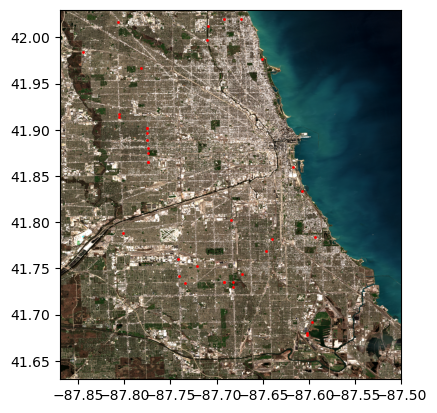

In [23]:
f,ax = matplotlib.pyplot.subplots()
lims = [[-87.87, -87.5], [41.63, 42.03]]
ax.set_xlim(lims[0])
ax.set_ylim(lims[1])

gdf1 = gpd.GeoDataFrame(df, geometry = gpd.points_from_xy(df['LONGITUDE'], df['LATITUDE']))

chicago = rasterio.open('../ChicagoGeoTIFF.tif')
rasterio.plot.show(chicago.read(), ax = ax, transform = chicago.transform)

gdf1.iloc[0:100].plot(ax = ax, color = 'red', markersize = 1.)

In [24]:
chicago.close()